'''<br>
Author: Nikhil Patil<br>
Date: 11-11-2024<br>
Last Modified by: Nikhil Patil<br>
Last Modified time: 11-11-2024 <br>
Title : Build a multiple linear regression model to predict apparent temperature from various features<br>

'''

## **Step 1: Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## **Step 2: Load the Dataset**

In [3]:
# Load the dataset (assuming it's saved as 'weatherHistory.csv')
df = pd.read_csv('weatherHistory.csv')

# Display the first few rows of the dataset
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## **Step 3: Understand the Dataset**
##### Examine the dataset to understand the columns and check for any null values.

In [4]:
# Check for null values
print(df.isnull().sum())

# View dataset information
print(df.info())


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64

## **Step 4: Select Features and Target Variable**
##### Define the input features (temperature, humidity, wind speed, wind bearing, visibility, pressure) and the target variable (apparent temperature).

In [5]:
# Define the independent variables (features) and the dependent variable (target)
X = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = df['Apparent Temperature (C)']


## **Step 5: Split the Data into Training and Testing Sets**
##### Splitting the dataset into training and testing sets is essential for evaluating model performance.

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Step 6: Initialize and Train the Linear Regression Model**
##### Create an instance of the Linear Regression model and train it using the training data.

In [7]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)


LinearRegression()

## **Step 7: Check Model Coefficients and Intercept**
#### The coefficients tell us how much each feature contributes to the prediction.

In [8]:
# Display the coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 1.12536568e+00  1.02300614e+00 -9.56361861e-02  5.25931749e-04
 -1.08969911e-03  2.01266185e-04]
Model Intercept: -2.578182040226805


## **Step 8: Make Predictions on the Testing Set**
##### Use the trained model to make predictions on the test data.

In [9]:
# Predict apparent temperature for the test set
y_pred = model.predict(X_test)
print(y_pred)


[28.68237401  8.4116828  13.50671119 ...  9.39414641 24.81111547
 18.03427106]


## **Step 9: Evaluate Model Performance**
##### Use metrics like Mean Squared Error (MSE) and R-squared (R²) to evaluate the model’s accuracy.

In [10]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error: 1.161573181671326
R-squared Score: 0.989960368221567


## **Step 10: Visualize Actual vs Predicted Values**
##### Plotting the actual vs predicted values provides insight into how well the model performs.

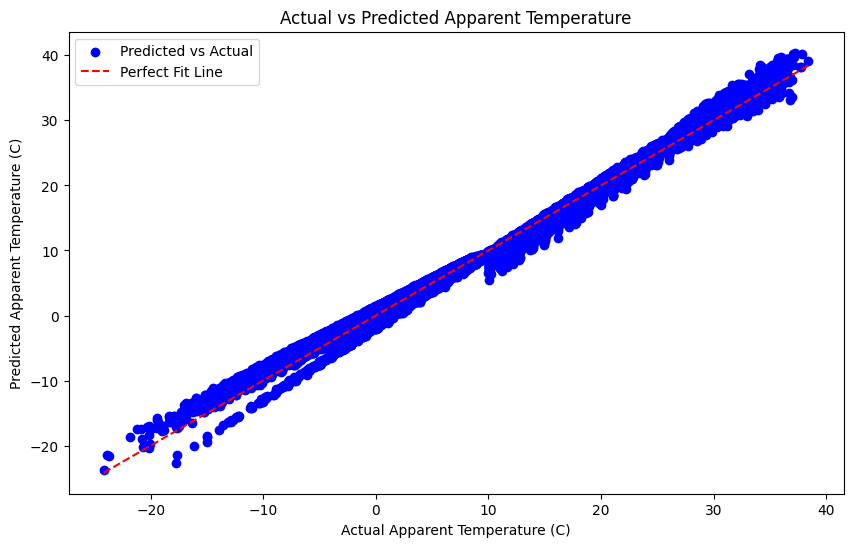

In [11]:
# Plotting actual vs predicted apparent temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel("Actual Apparent Temperature (C)")
plt.ylabel("Predicted Apparent Temperature (C)")
plt.legend()
plt.title("Actual vs Predicted Apparent Temperature")
plt.show()


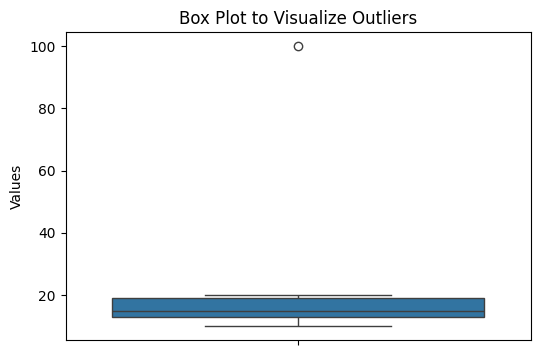

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
df = pd.DataFrame({'Values': [10, 12, 14, 15, 18, 20, 100]})

# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Values')
plt.title('Box Plot to Visualize Outliers')
plt.show()
